In [125]:
import os
import sys; sys.path.append("~/HHbbgg_ETH/Training/python") # to load packages
import training_utils as utils
import numpy as np
reload(utils)

<module 'training_utils' from '/mnt/t3nfs01/data01/shome/micheli/HHbbgg_ETH/Training/python/training_utils.pyc'>

In [126]:
ntuples = '20170526'
# "%" sign allows to interpret the rest as a system command
%env data=$utils.IO.ldata$ntuples
files = ! ls $data | sort -t_ -k 3 -n
signal = [s for s in files if "NonRes" in s]
diphotonJets = [s for s in files if "DiPhotonJets" in s]
gJets_lowPt = [s for s in files if "GJet_Pt-20to40" in s]
gJets_highPt = [s for s in files if "GJet_Pt-40" in s]

utils.IO.add_signal(ntuples,signal,1)
utils.IO.add_background(ntuples,diphotonJets,-1)
utils.IO.add_background(ntuples,gJets_lowPt,-2)
utils.IO.add_background(ntuples,gJets_highPt,-2)

for i in range(len(utils.IO.backgroundName)):        
    print "using background file n."+str(i)+": "+utils.IO.backgroundName[i]
for i in range(len(utils.IO.signalName)):    
    print "using signal file n."+str(i)+": "+utils.IO.signalName[i]

env: data=/mnt/t3nfs01/data01/shome/micheli/HHbbgg_ETH/root_files/20170526
using background file n.0: /mnt/t3nfs01/data01/shome/micheli/HHbbgg_ETH/root_files/20170526/output_DiPhotonJetsBox_MGG-80toInf_13TeV-Sherpa.root
using background file n.1: /mnt/t3nfs01/data01/shome/micheli/HHbbgg_ETH/root_files/20170526/output_GJet_Pt-20to40_DoubleEMEnriched_MGG-80toInf_TuneCUETP8M1_13TeV_Pythia8.root
using background file n.2: /mnt/t3nfs01/data01/shome/micheli/HHbbgg_ETH/root_files/20170526/output_GJet_Pt-40toInf_DoubleEMEnriched_MGG-80toInf_TuneCUETP8M1_13TeV_Pythia8.root
using signal file n.0: /mnt/t3nfs01/data01/shome/micheli/HHbbgg_ETH/root_files/20170526/AllNonResSig_20170526.root


In [ ]:
#use noexpand for root expressions, it needs this file https://github.com/ibab/root_pandas/blob/master/root_pandas/readwrite.py
branch_names = 'leadingJet_bDis,subleadingJet_bDis,noexpand:fabs(CosThetaStar_CS),noexpand:fabs(CosTheta_bb),noexpand:fabs(CosTheta_gg),noexpand:diphotonCandidate.Pt()/diHiggsCandidate.M(),noexpand:dijetCandidate.Pt()/diHiggsCandidate.M(),customLeadingPhotonIDMVA,customSubLeadingPhotonIDMVA,leadingPhotonSigOverE,subleadingPhotonSigOverE,sigmaMOverMDecorr,noexpand:sqrt((diphotonCandidate.Eta()-dijetCandidate.Eta())*(diphotonCandidate.Eta()-dijetCandidate.Eta())+TVector2::Phi_mpi_pi(subleadingPhoton.Phi()-dijetCandidate.Phi())*TVector2::Phi_mpi_pi(diphotonCandidate.Phi()-dijetCandidate.Phi()))'.split(",")
#branch_names = 'leadingJet_bDis,subleadingJet_bDis,noexpand:fabs(CosThetaStar_CS),noexpand:fabs(CosTheta_bb),noexpand:fabs(CosTheta_gg),noexpand:diphotonCandidate.Pt()/diHiggsCandidate.M(),noexpand:dijetCandidate.Pt()/diHiggsCandidate.M()'.split(",")
branch_names = [c.strip() for c in branch_names]
#branch_names = (b.replace(" ", "_") for b in branch_names)
#branch_names = list(b.replace("-", "_") for b in branch_names)
print branch_names

import pandas as pd
import root_pandas as rpd

#utils.IO.get_cross_sections('jsons/datasets80X_Moriond.json')
#utils.IO.w_sig.append(utils.IO.get_weight('signal','nrSM',0))
#utils.IO.w_bkg(utils.IO.get_weight('background','DiPhoJets',0))
#utils.IO.w_bkg(utils.IO.get_weight('background','GJets',0))
#utils.IO.w_bkg(utils.IO.get_weight('background','GJets',1))


utils.preprocessing.set_signals_and_backgrounds("bbggSelectionTree",branch_names)
X_bkg,y_bkg,weights_bkg,X_sig,y_sig,weights_sig=utils.preprocessing.set_variables(branch_names)

#relative weighting between components of one class is kept, all classes normalized to the same
weights_bkg,weights_sig=utils.preprocessing.normalize_process_weights(weights_bkg,y_bkg,weights_sig,y_sig)

X_bkg,y_bkg,weights_bkg = utils.preprocessing.randomize(X_bkg,y_bkg,weights_bkg)
X_sig,y_sig,weights_sig = utils.preprocessing.randomize(X_sig,y_sig,weights_sig)


y_total_train = utils.preprocessing.get_total_training_sample(y_sig,y_bkg).ravel()
X_total_train = utils.preprocessing.get_total_training_sample(X_sig,X_bkg)

y_total_test = utils.preprocessing.get_total_test_sample(y_sig,y_bkg).ravel()
X_total_test = utils.preprocessing.get_total_test_sample(X_sig,X_bkg)

w_total_train = utils.preprocessing.get_total_training_sample(weights_sig,weights_bkg).ravel()
w_total_test = utils.preprocessing.get_total_test_sample(weights_sig,weights_bkg).ravel()

['leadingJet_bDis', 'subleadingJet_bDis', 'noexpand:fabs(CosThetaStar_CS)', 'noexpand:fabs(CosTheta_bb)', 'noexpand:fabs(CosTheta_gg)', 'noexpand:diphotonCandidate.Pt()/diHiggsCandidate.M()', 'noexpand:dijetCandidate.Pt()/diHiggsCandidate.M()', 'customLeadingPhotonIDMVA', 'customSubLeadingPhotonIDMVA', 'leadingPhotonSigOverE', 'subleadingPhotonSigOverE', 'sigmaMOverMDecorr', 'noexpand:sqrt((diphotonCandidate.Eta()-dijetCandidate.Eta())*(diphotonCandidate.Eta()-dijetCandidate.Eta())+TVector2::Phi_mpi_pi(subleadingPhoton.Phi()-dijetCandidate.Phi())*TVector2::Phi_mpi_pi(diphotonCandidate.Phi()-dijetCandidate.Phi()))']


In [120]:
import xgboost as xgb
#FIXME parameteres
#clf = xgb.XGBClassifier(max_depth=10,learning_rate=0.2,n_estimators=500, min_child_weight=1e-5, nthread= 12)
clf = xgb.XGBClassifier(max_depth=5,learning_rate=0.2,n_estimators=100, min_child_weight=1e-5, nthread= 12)
#clf = ensemble.GradientBoostingClassifier(max_depth=10,learning_rate=0.1,n_estimators=200,verbose=1)
clf.fit(X_total_train,y_total_train, sample_weight=w_total_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.2, max_delta_step=0, max_depth=5,
       min_child_weight=1e-05, missing=None, n_estimators=100, nthread=12,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

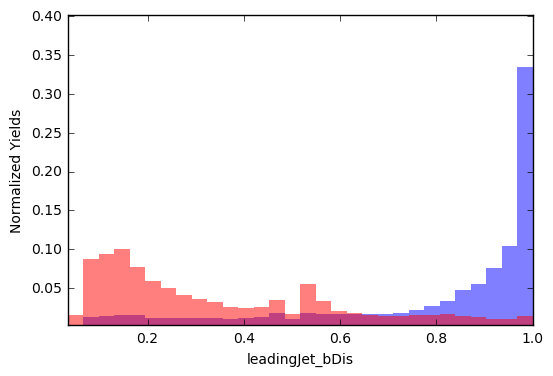

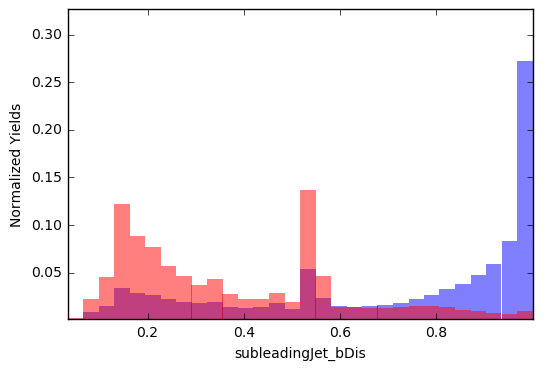

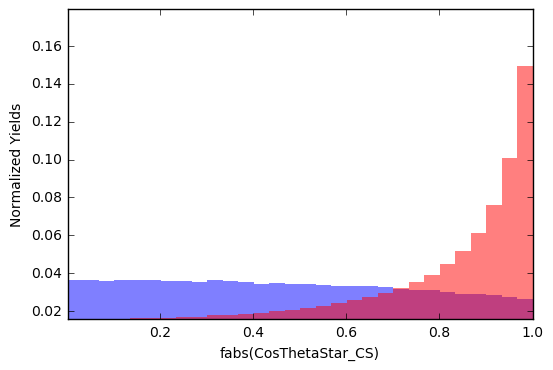

KeyboardInterrupt: 

In [229]:
#FIXME, do weighted plots?
utils.plotting.plot_input_variables(X_sig,X_bkg,branch_names)

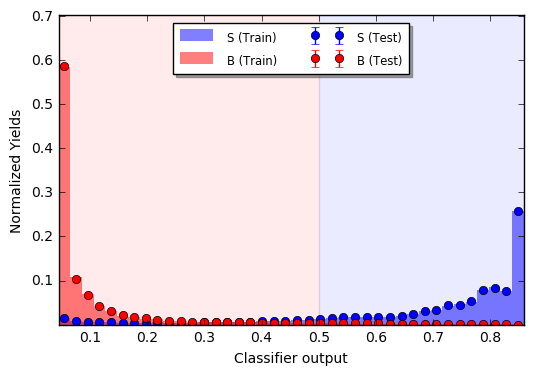

In [121]:
import matplotlib.pyplot as plt

X_total_test = utils.preprocessing.get_total_test_sample(X_sig,X_bkg)
y_total_test = utils.preprocessing.get_total_test_sample(y_sig,y_bkg).ravel()

utils.plotting.plot_classifier_output(clf,X_total_train,X_total_test,y_total_train,y_total_test,outString="xbrg")
plt.show()

In [51]:
bkg_train = X_total_train[y_total_train == -1]
print clf.predict_proba(bkg_train)[:,0] 
print clf.predict_proba(bkg_train)[:,1] 
print clf.predict_proba(bkg_train)[:,2] 

[ 0.00197843  0.05096103  0.02407886 ...,  0.00485183  0.00593206
  0.01907289]
[ 0.99677533  0.9338457   0.95034254 ...,  0.79748398  0.47218218
  0.96558708]
[ 0.00124624  0.01519331  0.02557863 ...,  0.1976642   0.52188575
  0.01534001]


In [59]:
bkg_train = X_total_train[y_total_train == -1]
print clf.predict_proba(bkg_train)[:,0] 
print clf.predict_proba(bkg_train)[:,1] 
print clf.predict_proba(bkg_train)[:,2] 

[ 0.055061    0.12778421  0.05098724 ...,  0.00015427  0.11611697
  0.00027659]
[ 0.78416479  0.87200946  0.9331829  ...,  0.91216987  0.87193131
  0.59956926]
[  1.60774276e-01   2.06298049e-04   1.58298314e-02 ...,   8.76758471e-02
   1.19517483e-02   4.00154203e-01]


In [52]:
bkg_train = X_total_train[y_total_train == -2]
print clf.predict_proba(bkg_train)[:,0] 
print clf.predict_proba(bkg_train)[:,1] 
print clf.predict_proba(bkg_train)[:,2] 

[ 0.18127121  0.11614756  0.1507366  ...,  0.19727221  0.58986998
  0.21564847]
[ 0.81389666  0.88246191  0.8482157  ...,  0.79742825  0.40997869
  0.78361613]
[ 0.00483213  0.00139051  0.00104769 ...,  0.0052995   0.00015136
  0.00073547]


[ 0.38659841  0.36782482  0.38997963 ...,  0.47482103  0.31415758
  0.46201545]


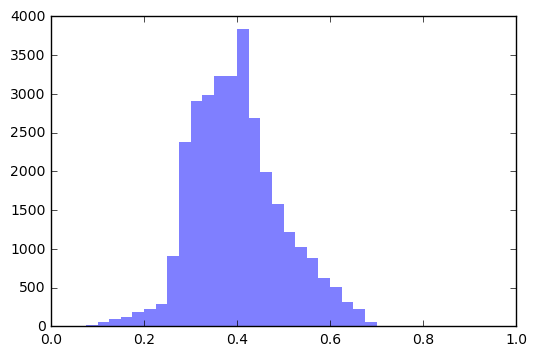

In [122]:
bkg_train = X_total_train[y_total_train == -2]
print clf.predict_proba(bkg_train)[:,1] 
Y_pred_bkg_train = clf.predict_proba(bkg_train)[:,1]

Histo_training_S = np.histogram(Y_pred_bkg_train,bins=40,range=(0,1))
ax1 = plt.subplot(111)

bin_edges = Histo_training_S[1]
bin_centers = ( bin_edges[:-1] + bin_edges[1:]  ) /2.
bin_widths = (bin_edges[1:] - bin_edges[:-1])


ax1.bar(bin_centers-bin_widths/2.,Histo_training_S[0],facecolor='blue',linewidth=0,width=bin_widths,label='S (Train)',alpha=0.5)
plt.show()

[ 0.46623415  0.44626176  0.47748938 ...,  0.39451239  0.58433026
  0.5900591 ]


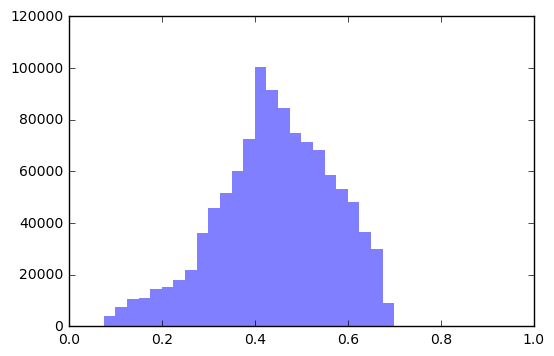

In [123]:
bkg_train = X_total_train[y_total_train == -1]
print clf.predict_proba(bkg_train)[:,1] 
Y_pred_bkg_train = clf.predict_proba(bkg_train)[:,1]

Histo_training_S = np.histogram(Y_pred_bkg_train,bins=40,range=(0,1))
ax1 = plt.subplot(111)

bin_edges = Histo_training_S[1]
bin_centers = ( bin_edges[:-1] + bin_edges[1:]  ) /2.
bin_widths = (bin_edges[1:] - bin_edges[:-1])


ax1.bar(bin_centers-bin_widths/2.,Histo_training_S[0],facecolor='blue',linewidth=0,width=bin_widths,label='S (Train)',alpha=0.5)
plt.show()

[ 0.85802627  0.85528362  0.85802627 ...,  0.85802627  0.78960699
  0.66247946]


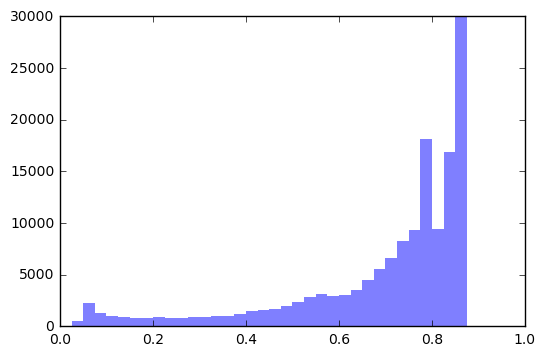

In [124]:
sig_train = X_total_train[y_total_train == 1]
print clf.predict_proba(sig_train)[:,2] 
Y_pred_sig_train = clf.predict_proba(sig_train)[:,2]

Histo_training_S = np.histogram(Y_pred_sig_train,bins=40,range=(0,1))
ax1 = plt.subplot(111)

bin_edges = Histo_training_S[1]
bin_centers = ( bin_edges[:-1] + bin_edges[1:]  ) /2.
bin_widths = (bin_edges[1:] - bin_edges[:-1])


ax1.bar(bin_centers-bin_widths/2.,Histo_training_S[0],facecolor='blue',linewidth=0,width=bin_widths,label='S (Train)',alpha=0.5)
plt.show()

In [10]:
print np.argwhere(y_bkg==-2)
print y_bkg[10]
print weights_sig

[[     57       0]
 [     74       0]
 [    104       0]
 ..., 
 [2254126       0]
 [2254145       0]
 [2254171       0]]
[-1]
[[ 0.0007174 ]
 [ 0.00072319]
 [ 0.0007174 ]
 ..., 
 [ 0.0007174 ]
 [ 0.0007174 ]
 [ 0.0007174 ]]


In [49]:
print weights_bkg[y_bkg==0]
w_prova=utils.preprocessing.normalize_process_weights(weights_bkg,y_bkg)
print w_prova

[[ 0.11088222]
 [ 0.01108822]
 [ 0.05544111]
 ..., 
 [ 0.01108822]
 [ 0.02217644]
 [ 0.01108822]]
bkg: 0
sum:0
48295.6361578
               weight
328203   2.295905e-07
1675727  2.295905e-07
657179   2.295905e-06
1104493  4.591811e-07
263551   2.295905e-07
792097   2.295905e-07
779493   2.295905e-07
2118190  2.295905e-07
766171   2.295905e-07
509657   4.591811e-07
1628394  4.591811e-07
1988996  4.591811e-07
1514218  1.147953e-06
641722   2.295905e-07
1647857  2.295905e-07
1842330  4.591811e-07
1734816  4.591811e-07
891174   2.295905e-07
1449149  2.295905e-07
2002616  2.295905e-07
1650523  4.591811e-07
1999241  1.147953e-06
2127235  2.295905e-07
1620379  2.295905e-07
1489341  2.295905e-07
1815846  2.295905e-07
2052537  4.591811e-07
624913   2.295905e-07
1670375  2.295905e-06
1129526  4.591811e-07
...               ...
759352   2.295905e-07
457087   2.295905e-07
2034977  1.147953e-06
1965981  4.591811e-07
837216   4.591811e-07
922424   2.295905e-07
1837524  4.591811e-07
798313   4.591811

In [52]:
print weights_bkg[y_bkg==-1]

[ 0.11088222  0.01108822  0.05544111 ...,  0.01108822  0.02217644
  0.01108822]


In [113]:
#use noexpand for root expressions, it needs this file https://github.com/ibab/root_pandas/blob/master/root_pandas/readwrite.py
branch_names = 'leadingJet_bDis,subleadingJet_bDis,noexpand:fabs(CosThetaStar_CS),noexpand:fabs(CosTheta_bb),noexpand:fabs(CosTheta_gg),noexpand:diphotonCandidate.Pt()/diHiggsCandidate.M(),noexpand:dijetCandidate.Pt()/diHiggsCandidate.M(),customLeadingPhotonIDMVA,customSubLeadingPhotonIDMVA,leadingPhotonSigOverE,subleadingPhotonSigOverE,sigmaMOverMDecorr,noexpand:sqrt((diphotonCandidate.Eta()-dijetCandidate.Eta())*(diphotonCandidate.Eta()-dijetCandidate.Eta())+TVector2::Phi_mpi_pi(subleadingPhoton.Phi()-dijetCandidate.Phi())*TVector2::Phi_mpi_pi(diphotonCandidate.Phi()-dijetCandidate.Phi()))'.split(",")
#branch_names = 'leadingJet_bDis,subleadingJet_bDis,noexpand:fabs(CosThetaStar_CS),noexpand:fabs(CosTheta_bb),noexpand:fabs(CosTheta_gg),noexpand:diphotonCandidate.Pt()/diHiggsCandidate.M(),noexpand:dijetCandidate.Pt()/diHiggsCandidate.M()'.split(",")
branch_names = [c.strip() for c in branch_names]
#branch_names = (b.replace(" ", "_") for b in branch_names)
#branch_names = list(b.replace("-", "_") for b in branch_names)
print branch_names

import pandas as pd
import root_pandas as rpd

#utils.IO.get_cross_sections('jsons/datasets80X_Moriond.json')
#utils.IO.w_sig.append(utils.IO.get_weight('signal','nrSM',0))
#utils.IO.w_bkg(utils.IO.get_weight('background','DiPhoJets',0))
#utils.IO.w_bkg(utils.IO.get_weight('background','GJets',0))
#utils.IO.w_bkg(utils.IO.get_weight('background','GJets',1))


utils.preprocessing.set_signals_and_backgrounds("bbggSelectionTree",branch_names)
X_bkg,y_bkg,weights_bkg,X_sig,y_sig,weights_sig=utils.preprocessing.set_variables(branch_names)


weights_bkg,weights_sig=utils.preprocessing.normalize_process_weights(weights_bkg,y_bkg,weights_sig,y_sig)



['leadingJet_bDis', 'subleadingJet_bDis', 'noexpand:fabs(CosThetaStar_CS)', 'noexpand:fabs(CosTheta_bb)', 'noexpand:fabs(CosTheta_gg)', 'noexpand:diphotonCandidate.Pt()/diHiggsCandidate.M()', 'noexpand:dijetCandidate.Pt()/diHiggsCandidate.M()', 'customLeadingPhotonIDMVA', 'customSubLeadingPhotonIDMVA', 'leadingPhotonSigOverE', 'subleadingPhotonSigOverE', 'sigmaMOverMDecorr', 'noexpand:sqrt((diphotonCandidate.Eta()-dijetCandidate.Eta())*(diphotonCandidate.Eta()-dijetCandidate.Eta())+TVector2::Phi_mpi_pi(subleadingPhoton.Phi()-dijetCandidate.Phi())*TVector2::Phi_mpi_pi(diphotonCandidate.Phi()-dijetCandidate.Phi()))']
sig
1
[[ 0.02217644]
 [ 0.01108822]
 [ 0.01108822]
 ..., 
 [ 0.4227185 ]
 [ 0.4227185 ]
 [ 0.4227185 ]]
[  4.59181096e-07   2.29590548e-07   2.29590548e-07 ...,   1.59734641e-05
   1.59734641e-05   1.59734641e-05]
sig----------
          weight
294460  0.000717
26599   0.000717
266927  0.000717
30680   0.000717
107573  0.000723
227001  0.000717
263865  0.000717
256936  0.000

In [110]:
print type(weights_sig)
print type(y_sig)
print type(weights_bkg)
print type(y_bkg)
print utils.IO.sigProc[0]

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
1
